<h3>Association Rule Mining</h3>

<h> Data preprocessing

In [25]:
import pandas as pd
import numpy as np
# from googletrans import Translator

cust = pd.read_csv('/DGS/SAS/dataset/olist_customers_dataset.csv')
cust.head(5)

geoloc = pd.read_csv('/DGS/SAS/dataset/olist_geolocation_dataset.csv')
geoloc.head(5)

loc_coordnts = geoloc[[
    'geolocation_zip_code_prefix',
    'geolocation_lat',
    'geolocation_lng'
]].groupby('geolocation_zip_code_prefix').mean().reset_index()

cols= [
    'customer_id',
    'customer_unique_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    'geolocation_lat',
    'geolocation_lng'
]

customer_data = pd.merge(
    left= cust,
    right= loc_coordnts,
    left_on= 'customer_zip_code_prefix',
    right_on= 'geolocation_zip_code_prefix',
    how= 'left',
)[cols]

customer_data.head(5)



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


In [26]:
customer_data.to_csv('/DGS/SAS/generated_dataset/customer_data.csv')

orders = pd.read_csv('/DGS/SAS/dataset/olist_orders_dataset.csv')
orders.head(5)

ord_items = pd.read_csv('/DGS/SAS/dataset/olist_order_items_dataset.csv')
ord_items.head(5)

cols= [
    'order_id',
    'customer_id',
    'order_purchase_timestamp',
    'order_item_id',
    'product_id',
    'price',
    'freight_value'
]

complete_order = pd.merge(
    left= orders,
    right= ord_items,
    on= 'order_id',
    how= 'inner'
)[cols]

complete_order.head(5)



,order_id,customer_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


In [27]:
cols = [
    'order_id',
    'order_purchase_timestamp',
    'order_item_id',
    'product_id',
    'price',
    'freight_value',
    'customer_unique_id'
]

cust_orders = pd.merge(
    left= complete_order,
    right= cust,
    on= 'customer_id',
    how= 'inner'
)[cols]

cust_orders.head(5)



,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6


In [29]:
cust_orders.to_csv('/DGS/SAS/generated_dataset/customer_order.csv', index= False)

products = pd.read_csv('/DGS/SAS/dataset/olist_products_dataset.csv')
products.head(5)

transln = pd.read_csv('/DGS/SAS/dataset/product_category_name_translation.csv')
transln.head(5)

products = pd.merge(
    left= products,
    right= transln,
    on= 'product_category_name',
    how= 'left'
)

products.head(5)

cust_order = pd.read_csv('/DGS/SAS/generated_dataset/customer_order.csv')
cust_order.head(5)



,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6


In [30]:
cust_order = pd.merge(
    left= cust_order,
    right= products[['product_id','product_category_name_english']],
    on= 'product_id',
    how= 'inner'
)

cust_order.head(5)

cust_order.to_csv('/DGS/SAS/generated_dataset/customer_order.csv', index= False)

txn_data = pd.get_dummies(
    data= cust_order[[
        'customer_unique_id',
        'order_purchase_timestamp',
        'product_category_name_english'
    ]], 
    columns= ['product_category_name_english'],
    prefix= 'catg'
).groupby([
    'customer_unique_id',
    'order_purchase_timestamp'
]).sum()

txn_data = txn_data.reset_index()
txn_data
txn_data.to_csv('/DGS/SAS/generated_dataset/transaction_data.csv', index= False)

In [31]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

df = pd.read_csv('/DGS/SAS/generated_dataset/transaction_data.csv')
cols = df.columns
cols = cols.str.replace('catg_','')
cols = cols.str.replace('_',' ')
df.columns = cols
df.head(5)
print(df.shape)

(98381, 73)


In [2]:
products = pd.read_csv("/DGS/SAS/dataset/olist_products_dataset.csv")
# Get the all categories
categories = products['product_category_name'].unique()

# print(categories)
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [32]:
# Grouping by customer_id only and summing all orders
data = df.copy()
static_data = data.drop('order purchase timestamp', axis= 1)
static_data = static_data.groupby('customer unique id').sum().reset_index()

for col in static_data.columns[1:]:
    static_data[col] = static_data[col].apply(lambda x: 1 if x>0 else 0)
print(static_data.shape)
static_data.head(5)

(95420, 72)


,customer unique id,agro industry and commerce,air conditioning,art,arts and craftmanship,audio,auto,baby,bed bath table,books general interest,...,security and services,signaling and security,small appliances,small appliances home oven and coffee,sports leisure,stationery,tablets printing image,telephony,toys,watches gifts
0,0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# 存储static_data
static_data.to_csv('/DGS/SAS/generated_data/static_data.csv', index=False)

In [6]:
patterns = fpgrowth(static_data.iloc[:,1:], min_support=0.00002, use_colnames= True)

# large_itemsets = patterns[patterns['itemsets'].apply(lambda x: len(x) > 2)]
large_itemsets = patterns.sort_values('support', ascending=False)
large_itemsets.support = large_itemsets.support * len(static_data)
large_itemsets

/root/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,9145.0,(bed bath table)
1,8678.0,(health beauty)
5,7515.0,(sports leisure)
8,6557.0,(computers accessories)
22,6317.0,(furniture decor)
...,...,...
199,2.0,"(toys, furniture living room)"
259,2.0,"(construction tools construction, computers ac..."
200,2.0,"(furniture living room, baby)"
202,2.0,"(furniture living room, garden tools)"


In [7]:
# items_sum
# patterns = fpgrowth(items_sum.iloc[:,1:], min_support=0.00002, use_colnames= True)

# print(static_data.shape)
# large_itemsets = patterns[patterns['itemsets'].apply(lambda x: len(x) > 2)]
# large_itemsets = large_itemsets.sort_values('support', ascending=False)

# print(large_itemsets)

In [8]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(patterns, metric="confidence", min_threshold=0.1)
rules = rules.sort_values('confidence', ascending= False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,"(bed bath table, construction tools lights)",(furniture decor),0.000031,0.066202,0.000021,0.666667,10.070181,1.887858e-05,2.801394,0.900725
16,"(home construction, housewares)",(furniture decor),0.000042,0.066202,0.000021,0.500000,7.552636,1.818478e-05,1.867596,0.867632
13,"(cool stuff, auto)",(bed bath table),0.000073,0.095839,0.000021,0.285714,2.981176,1.392920e-05,1.265825,0.664611
19,(fashion childrens clothes),(fashion bags accessories),0.000084,0.018843,0.000021,0.250000,13.267519,1.938017e-05,1.308209,0.924705
5,"(furniture decor, home confort)",(bed bath table),0.000094,0.095839,0.000021,0.222222,2.318693,1.192040e-05,1.162492,0.568776
11,"(perfumery, housewares)",(health beauty),0.000094,0.090945,0.000021,0.222222,2.443471,1.238202e-05,1.168785,0.590802
0,"(bed bath table, garden tools)",(housewares),0.000168,0.061004,0.000031,0.187500,3.073570,2.121082e-05,1.155687,0.674759
2,"(bed bath table, fashion bags accessories)",(housewares),0.000115,0.061004,0.000021,0.181818,2.980431,1.392744e-05,1.147662,0.664555
3,"(fashion bags accessories, housewares)",(bed bath table),0.000115,0.095839,0.000021,0.181818,1.897112,9.911613e-06,1.105085,0.472938
4,(home confort),(bed bath table),0.004150,0.095839,0.000566,0.136364,1.422834,1.681784e-04,1.046923,0.298416


In [12]:
# 对于每个用户，只保留购买了两个以上的数据
items_2 = static_data[static_data.iloc[:,1:].sum(axis=1)>1]
# 保存数据
items_2.to_csv('/DGS/SAS/generated_dataset/items_2.csv', index=False)

<h3>Collabarative Filtering</h3>

In [16]:
# 对items_2使用协同过滤
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import cosine_similarity


df = pd.read_csv('/DGS/SAS/generated_dataset/items_2.csv', index_col='customer unique id')
# Compute the cosine similarity matrix
item_similarity = cosine_similarity(df.T)  # Transpose to get item-item matrix
item_similarity_df = pd.DataFrame(item_similarity, index=df.columns, columns=df.columns)


<h4>Calculate item-item similarity

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
item_similarity = cosine_similarity(df.T)  # Transpose to get item-item matrix
item_similarity_df = pd.DataFrame(item_similarity, index=df.columns, columns=df.columns)


In [19]:
def recommend_items(item_name, similarity_data, items_purchased, n_items=5):
    # Check if item exists in our similarity matrix
    if item_name not in similarity_data.columns:
        return "Item not in database."

    # Get similarity scores for the item with all other items
    sim_scores = similarity_data[item_name]

    # Filter out items already purchased by the user
    sim_scores = sim_scores.drop(items_purchased)

    # Get the items with the highest similarity scores
    top_items = sim_scores.sort_values(ascending=False).head(n_items)
    return top_items

In [20]:
# Simulate a user who bought 'bed bath table' and 'toys'
user_purchased = ['bed bath table', 'toys']
recommended_products = recommend_items('bed bath table', item_similarity_df, user_purchased)
print("Recommended products:")
print(recommended_products)

Recommended products:
furniture decor    0.296092
home confort       0.272231
housewares         0.161075
baby               0.121167
cool stuff         0.078814
Name: bed bath table, dtype: float64


In [21]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train, test = train_test_split(df, test_size=0.2)

# Create similarity matrix from train set
train_similarity = cosine_similarity(train.T)
train_similarity_df = pd.DataFrame(train_similarity, index=train.columns, columns=train.columns)

# Test the recommendations against the test set
# Evaluate using your chosen metric (precision, recall)


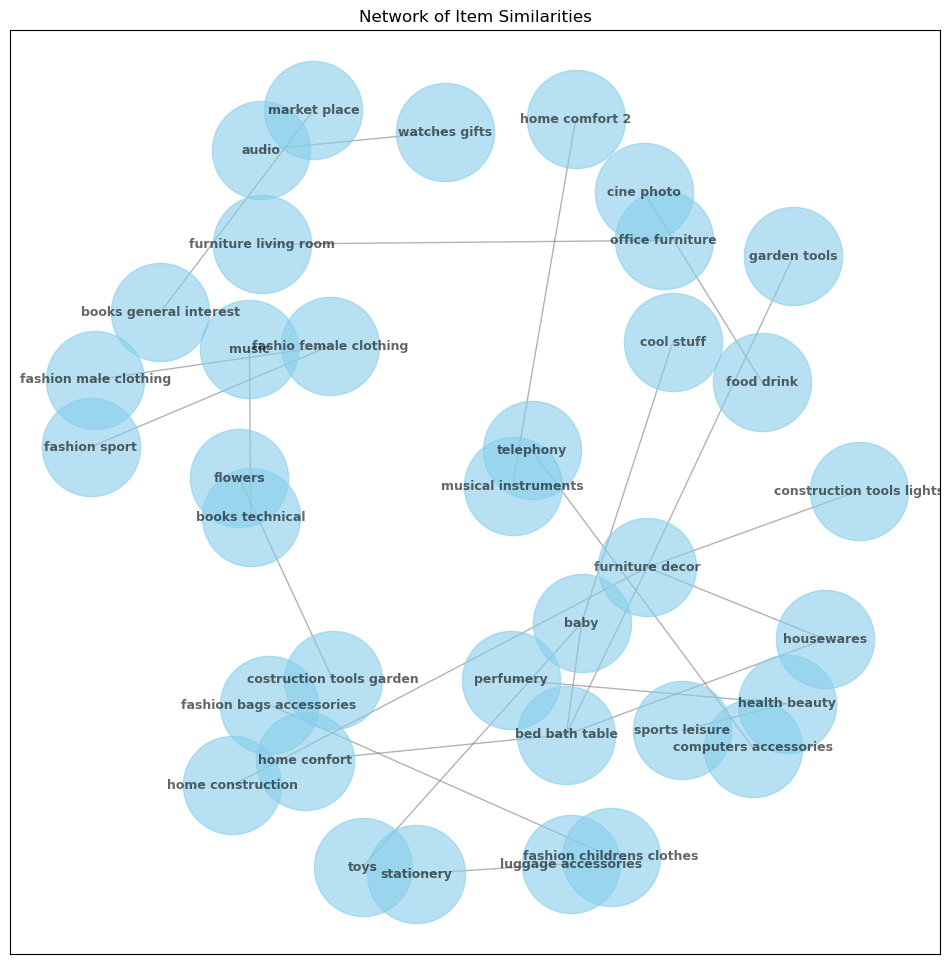

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def create_network_graph(top_n=50):
    # Create a graph
    G = nx.Graph()

    # Add nodes and edges from the top N most similar pairs
    for item in item_similarity_df.columns:
        top_similar = recommend_items(item, item_similarity_df, [item], top_n)
        for similar_item, score in top_similar.items():
            if score > 0.1:  # Filter out very low similarities to declutter the graph
                G.add_edge(item, similar_item, weight=score)

    # Draw the graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5)  # k regulates the distance between nodes
    nx.draw_networkx(G, pos, node_color='skyblue', node_size=5000, edge_color='gray', alpha=0.6, font_size=9, font_weight='bold')
    plt.title('Network of Item Similarities')
    plt.show()

create_network_graph()